## Boston Data in Jupyter Lab
### Machine Learning


__First we will load the Boston data from Library(MASS)__ 

In [31]:
library(MASS)

data(Boston)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


__The boston data sheet contains information about the city. It contains things such as crime, businesses, nitrogen oxide concentrations, and tax valuation of properties__

Lets do some data exploration to see what we are working with.


In [32]:
head(Boston, 3)
tail(Boston,2)
Boston[5,]
head(Boston,5)[1]
names(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21,396.90,7.88,11.9


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


,crim
,<dbl>
1,0.00632
2,0.02731
3,0.02729
4,0.03237
5,0.06905


[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

Let's focus on Crime since it is the first one we see here. Now we can find the mean median and range of crime in boston. All of these are a built in function in R. 

In [33]:
mean(Boston$crim)
median(Boston$crim)
range(Boston$crim)

[1] 3.613524

[1] 0.25651

[1]  0.00632 88.97620

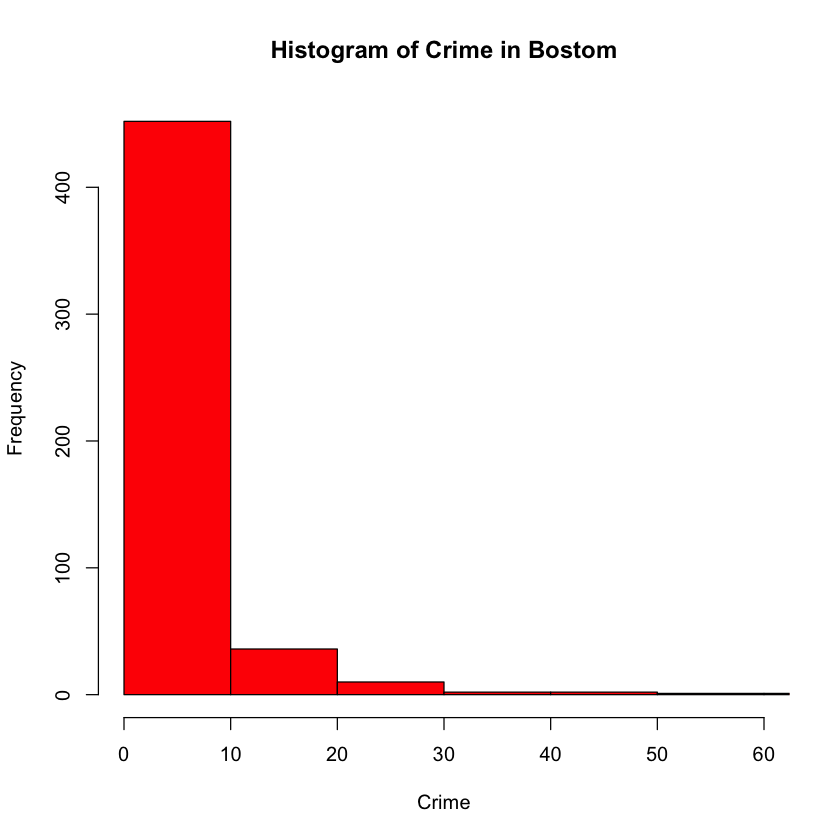

In [34]:
# Now using this information, we can create a histogram.

hist(Boston$crim,
     main = "Histogram of Crime in Bostom",
     xlab = "Crime",
     xlim = c(0,60),
     col= "red")

This tells us the crume per capita in the city, and the frequency at which it is committed. 

In [35]:
cor.test(Boston$crim, Boston$medv) 


	Pearson's product-moment correlation

data:  Boston$crim and Boston$medv
t = -9.4597, df = 504, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4599064 -0.3116859
sample estimates:
       cor 
-0.3883046 


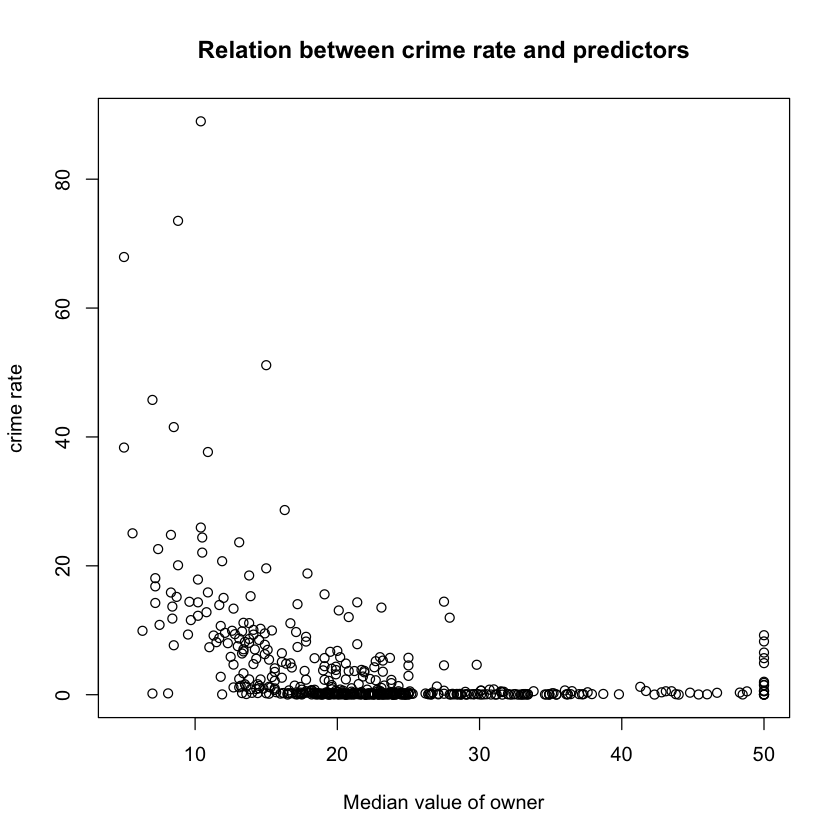

In [36]:
# Another way would be to:

plot(crim~medv, data=Boston, main="Relation between crime rate and predictors", xlab="Median value of owner", ylab ="crime rate")

As the median value increases, the number of rooms available increases. this is a positive correlation.

The Charles river also shows a positive correlation, meaning that the houses bound by the river have higher median house value, hence the positive correlation.



	Pearson's product-moment correlation

data:  Boston$chas and Boston$medv
t = 3.9964, df = 504, p-value = 7.391e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08945816 0.25848001
sample estimates:
      cor 
0.1752602 


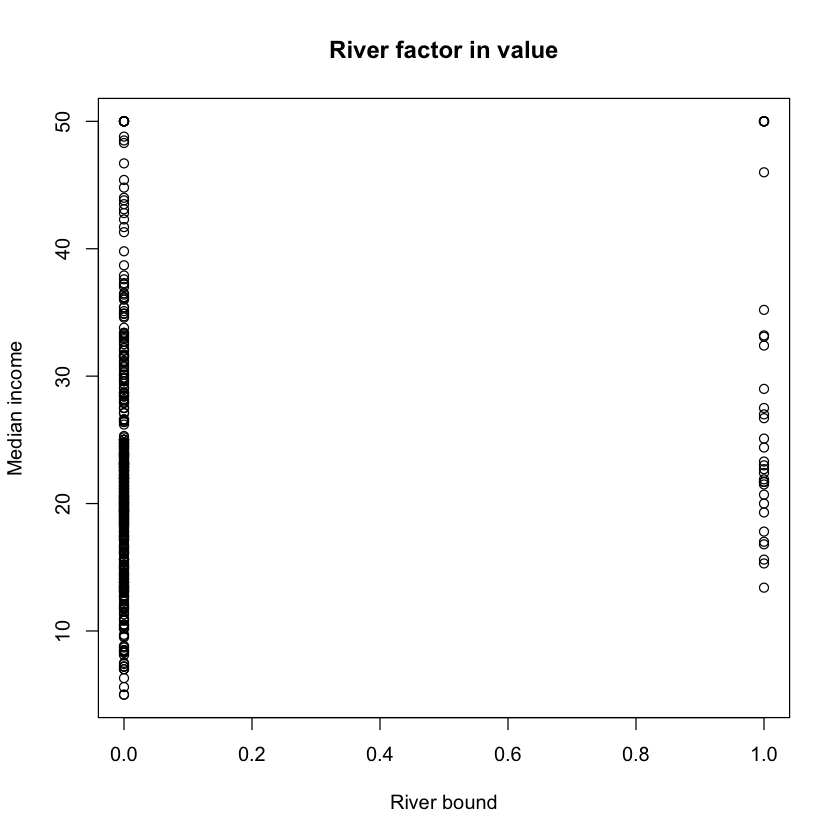

In [37]:
plot(x=Boston$chas,
    y=Boston$medv,
    main = "River factor in value",
    xlab = "River bound",
    ylab = "Median income")
cor.test(Boston$chas, Boston$medv)

In [38]:
# In one go we will look at the summary and do some data cleaning

summary(Boston$rad)
unique(Boston$rad)

sum(Boston$rad ==24)
mean((132/506) *100) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   9.549  24.000  24.000 

[1]  1  2  3  5  4  8  6  7 24

[1] 132

[1] 26.08696

26% of the homes make up rad access of 24 homes.

In [39]:
cols <- c("crim", "rm", "lstat", "medv")
summary(Boston[cols])
which.max(Boston$medv)
Boston[which.max(Boston$medv), cols]

      crim                rm            lstat            medv      
 Min.   : 0.00632   Min.   :3.561   Min.   : 1.73   Min.   : 5.00  
 1st Qu.: 0.08204   1st Qu.:5.886   1st Qu.: 6.95   1st Qu.:17.02  
 Median : 0.25651   Median :6.208   Median :11.36   Median :21.20  
 Mean   : 3.61352   Mean   :6.285   Mean   :12.65   Mean   :22.53  
 3rd Qu.: 3.67708   3rd Qu.:6.623   3rd Qu.:16.95   3rd Qu.:25.00  
 Max.   :88.97620   Max.   :8.780   Max.   :37.97   Max.   :50.00  

[1] 162

,crim,rm,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>
162,1.46336,7.489,1.73,50
